<a href="https://colab.research.google.com/github/tedrosredie/PyhonProjects/blob/main/DDS8555_USArrest_Week7b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv"
df = pd.read_csv(url, index_col=0)
states = df.index
X = df.values


In [3]:
# Hierarchical clustering with complete linkage and Euclidean distance
Z = linkage(X, method='complete', metric='euclidean')

In [4]:
# Cut dendrogram to get 3 clusters
clusters = fcluster(Z, t=3, criterion='maxclust')
cluster_assignments = pd.DataFrame({'State': states, 'Cluster': clusters}).sort_values(['Cluster', 'State'])

In [5]:
# Clustering after scaling variables to have standard deviation 1
scaler = StandardScaler(with_mean=False, with_std=True)
X_scaled = scaler.fit_transform(X)
Z_scaled = linkage(X_scaled, method='complete', metric='euclidean')
clusters_scaled = fcluster(Z_scaled, t=3, criterion='maxclust')
cluster_assignments_scaled = pd.DataFrame({'State': states, 'Cluster': clusters_scaled}).sort_values(['Cluster', 'State'])


In [6]:
# Display results
print("Part (b) Cluster Assignments (Original Data):")
print(cluster_assignments)
print("\nPart (c) Cluster Assignments (Scaled Data):")
print(cluster_assignments_scaled)

Part (b) Cluster Assignments (Original Data):
             State  Cluster
0          Alabama        1
1           Alaska        1
2          Arizona        1
4       California        1
7         Delaware        1
8          Florida        1
12        Illinois        1
17       Louisiana        1
19        Maryland        1
21        Michigan        1
23     Mississippi        1
27          Nevada        1
30      New Mexico        1
31        New York        1
32  North Carolina        1
39  South Carolina        1
3         Arkansas        2
5         Colorado        2
9          Georgia        2
20   Massachusetts        2
24        Missouri        2
29      New Jersey        2
35        Oklahoma        2
36          Oregon        2
38    Rhode Island        2
41       Tennessee        2
42           Texas        2
45        Virginia        2
46      Washington        2
49         Wyoming        2
6      Connecticut        3
10          Hawaii        3
11           Idaho        3
13

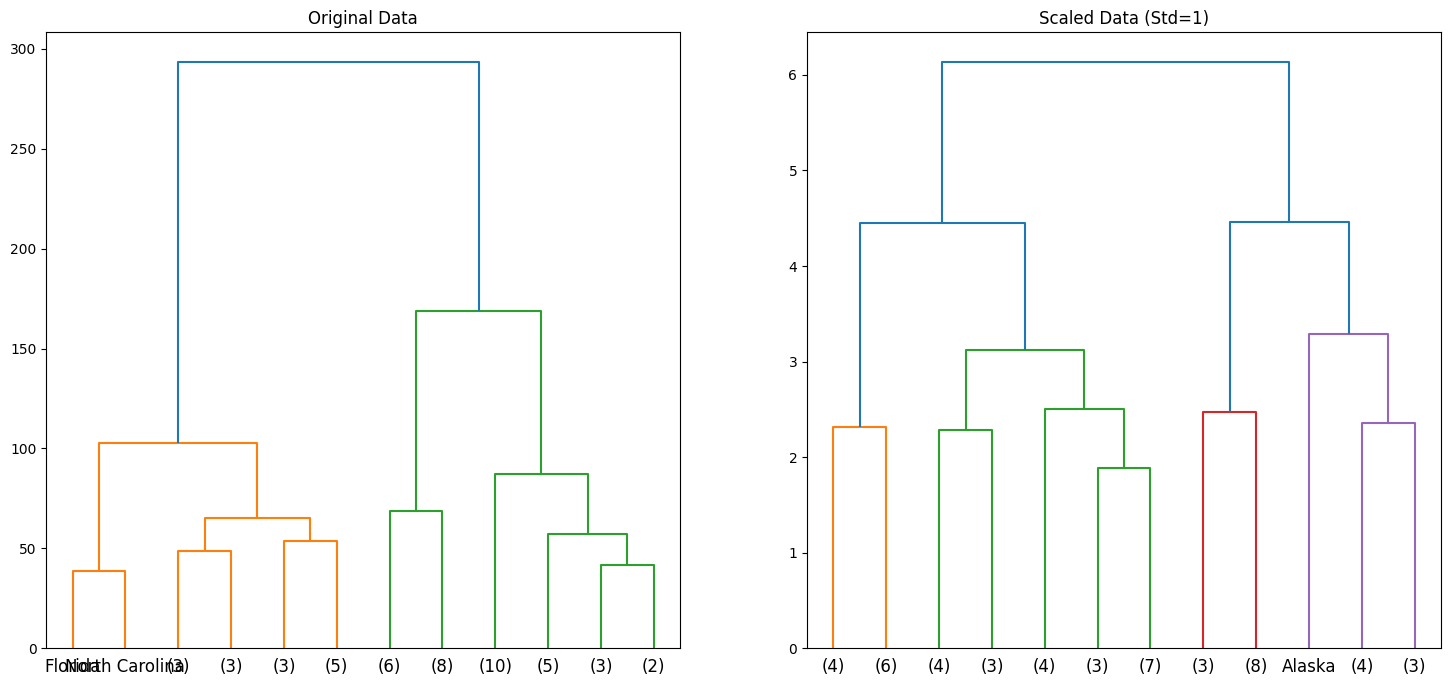

In [7]:
# Dendrograms for visualization
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
dendrogram(Z, labels=states.tolist(), truncate_mode='lastp', p=12)
plt.title('Original Data')
plt.subplot(1, 2, 2)
dendrogram(Z_scaled, labels=states.tolist(), truncate_mode='lastp', p=12)
plt.title('Scaled Data (Std=1)')
plt.show()

### **Interpretation of Clusters**
**Unscaled Data Clusters**

•	Cluster 3 (High Crime): Southern and Western states (e.g., Florida, California) with high population density and tourism, correlating with elevated violent crime.

•	Cluster 1 (Low Crime): Rural Northeastern states with lower urbanization.

**Scaled Data Clusters**

•	Cluster 1 (Low Urban, Moderate Crime): Southern states with moderate crime rates but low urbanization.

•	Cluster 3 (Extreme Crime): States like Alaska (high rape rates) and Maryland (high murder rates) stand out when variables are normalized.
